# **Aula 09 - Redes Neurais: MultiLayer Perceptron (MLP)**
Sílvia Moraes
---
Neste exemplo usamos o **dataset da planta velha**, disponível em https://archive.ics.uci.edu/dataset/53/velha


In [1]:
#importando os pacotes usados
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Fazendo a carga do dataset e gerando os conjuntos X (atributos de entrada) e Y (tipo de planta velha).

In [2]:
#Exemplo com a planta velha
velha = pd.read_csv("amostras_.csv",sep=';')
print(velha.shape)
X = velha.iloc[:, [0, 1, 2, 3,4,5,6,7,8]].values
y = velha.iloc[:, [9]].values


(750, 10)


Printando os dados de entrada e os rótulos de cada coluna.

In [3]:
print("DADOS DE ENTRADA")
print(velha.columns[0],velha.columns[1], velha.columns[2], velha.columns[3],velha.columns[4],velha.columns[5],velha.columns[6],velha.columns[7],velha.columns[8])
print(X)

DADOS DE ENTRADA
pos1 pos2 pos3 pos4 pos5 pos6 pos7 pos8 pos9
[[ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 1 -1  0 ...  0  0  0]
 ...
 [ 0  1  0 ... -1  1 -1]
 [ 0  1  1 ... -1 -1 -1]
 [ 0  1  1 ... -1 -1 -1]]


In [4]:
print("DADOS DE SAÍDA")
print("Classe do jogo da velha")
print(y)

DADOS DE SAÍDA
Classe do jogo da velha
[['Em_jogo']
 ['Em_jogo']
 ['Em_jogo']
 ['Em_jogo']
 ['Em_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Fim_de_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Em_jogo']
 ['Fim_de_jogo']
 ['Em_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo

Divisão dos conjuntos de treino e teste usando o método train_test_split. O conjunto de treino ficou com 80% dos dados e o restante, 20%, ficou para o conjunto de teste.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, stratify=y, random_state=42)
print(X_test.shape)

(75, 9)


In [6]:
X_tr, X_v, y_tr, y_v = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=42)
print(X_v.shape)



(68, 9)


In [7]:
print("----------Conjunto de Treino-----------")
for i in range(0,len(X_tr)):
  print(i,"-", X_tr[i],"-",y_tr[i])

----------Conjunto de Treino-----------
0 - [-1  1 -1 -1  1  1 -1  0  1] - ['Fim_de_jogo']
1 - [-1  1 -1  0  0  1 -1  1  0] - ['Possibilidade_de_fim_de_jogo']
2 - [ 0  1 -1  0  0  0  1 -1  0] - ['Em_jogo']
3 - [ 1 -1  1  0  0  1 -1  1 -1] - ['Em_jogo']
4 - [ 1 -1  1  1 -1 -1 -1  0  1] - ['Possibilidade_de_fim_de_jogo']
5 - [-1  1  0 -1  0 -1  1  1  1] - ['Fim_de_jogo']
6 - [ 0  1 -1  1 -1 -1  0  0  1] - ['Em_jogo']
7 - [-1  1  1  0 -1  1  0 -1  1] - ['Fim_de_jogo']
8 - [-1  1 -1  1 -1  0  0  1  0] - ['Em_jogo']
9 - [ 1 -1  1  1  1 -1 -1  1 -1] - ['Fim_de_jogo']
10 - [ 0  1 -1  1  0  1 -1  0  0] - ['Possibilidade_de_fim_de_jogo']
11 - [ 0  1 -1  1  1  1  0 -1 -1] - ['Fim_de_jogo']
12 - [ 1 -1  1  0 -1  1 -1  0  0] - ['Possibilidade_de_fim_de_jogo']
13 - [-1  1 -1  0  0  0  1  0  0] - ['Em_jogo']
14 - [ 1 -1  1  1  1 -1  0  0 -1] - ['Em_jogo']
15 - [-1  1 -1  1 -1 -1  1  0  1] - ['Possibilidade_de_fim_de_jogo']
16 - [-1  1  1 -1  0  1 -1  1 -1] - ['Fim_de_jogo']
17 - [ 0  1 -1  1  0 -1 -

In [8]:
print("\n----------Conjunto de Validacao-----------")
for i in range(0,len(X_v)):
  print(i,"-",X_v[i],"-",y_v[i])


----------Conjunto de Validacao-----------
0 - [ 1 -1  1  0  0  1 -1 -1  1] - ['Fim_de_jogo']
1 - [ 0  1 -1  1  0  0 -1  0  0] - ['Em_jogo']
2 - [ 1 -1  1  1 -1  0 -1  0  0] - ['Em_jogo']
3 - [ 0  1 -1  1 -1  1  1  0 -1] - ['Possibilidade_de_fim_de_jogo']
4 - [-1  1 -1 -1  1  0  0  1  1] - ['Fim_de_jogo']
5 - [ 0  1 -1  0 -1  1  1 -1  0] - ['Em_jogo']
6 - [ 0  1 -1  1 -1  1  0  1 -1] - ['Possibilidade_de_fim_de_jogo']
7 - [ 1 -1  1  0 -1  0  1  0  0] - ['Possibilidade_de_fim_de_jogo']
8 - [ 0  1 -1  1  0  0  0  0 -1] - ['Em_jogo']
9 - [-1  1 -1  1 -1 -1  0  1  1] - ['Possibilidade_de_fim_de_jogo']
10 - [ 0  1 -1 -1  0  1  1 -1  1] - ['Em_jogo']
11 - [ 1 -1  1 -1 -1 -1  0  1  1] - ['Fim_de_jogo']
12 - [ 0  1 -1 -1  0  0  1  0  1] - ['Em_jogo']
13 - [ 0  1 -1 -1 -1  1  1 -1  1] - ['Possibilidade_de_fim_de_jogo']
14 - [ 0  1 -1 -1  1  1 -1  1  0] - ['Fim_de_jogo']
15 - [ 0  1 -1  1  1 -1 -1  0  0] - ['Possibilidade_de_fim_de_jogo']
16 - [-1  1  1  1 -1  1 -1  0 -1] - ['Fim_de_jogo']
17 -

In [9]:
print("\n----------Conjunto de Teste-----------")
for i in range(0,len(X_test)):
  print(i,"-",X_test[i],"-",y_test[i])


----------Conjunto de Teste-----------
0 - [ 0  1  1 -1  1  0  1 -1 -1] - ['Fim_de_jogo']
1 - [-1  1 -1  1  1 -1  0 -1  1] - ['Possibilidade_de_fim_de_jogo']
2 - [-1  1 -1  1  0  0  1 -1  1] - ['Em_jogo']
3 - [-1  1 -1 -1  0  0  1  1  1] - ['Fim_de_jogo']
4 - [ 0  1 -1  1  0 -1  0  0  0] - ['Em_jogo']
5 - [-1  1 -1  1  1  0 -1 -1  1] - ['Possibilidade_de_fim_de_jogo']
6 - [-1  1  1 -1 -1  0  1  1 -1] - ['Fim_de_jogo']
7 - [ 0  1 -1  0  0  1  0 -1  0] - ['Em_jogo']
8 - [-1  1 -1 -1  1  1  1 -1  0] - ['Possibilidade_de_fim_de_jogo']
9 - [ 0  1 -1  0  1  0  0  0 -1] - ['Possibilidade_de_fim_de_jogo']
10 - [ 0  1 -1  0  1 -1  1 -1  1] - ['Em_jogo']
11 - [ 1 -1  1 -1 -1  0 -1  1  1] - ['Possibilidade_de_fim_de_jogo']
12 - [-1  1  0 -1  1  1 -1  0  0] - ['Fim_de_jogo']
13 - [ 1 -1  1  1  0 -1  1 -1  0] - ['Fim_de_jogo']
14 - [ 1 -1  1 -1  1 -1  0  1 -1] - ['Possibilidade_de_fim_de_jogo']
15 - [0 1 0 0 0 0 0 0 0] - ['Em_jogo']
16 - [-1  1 -1  0  1  0 -1  1  1] - ['Fim_de_jogo']
17 - [ 0  1 -

Gerando o classificador com a seguinte configuração:

*   algoritmo: adam
*   40 neurônios na camada oculta, portanto a topologia resultante foi 4 x 40 x 3
*   taxa de aprendizagem inicial de 0.1
*   constante de momentum de 0.5

Função de perda geralmente inferior a 0.05.




In [10]:
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(50,), learning_rate_init=0.1, momentum=0.5, verbose=True)
clf.fit(X_tr, y_tr.ravel())

Iteration 1, loss = 1.32030469
Iteration 2, loss = 1.28267727
Iteration 3, loss = 1.01493263
Iteration 4, loss = 0.91652725
Iteration 5, loss = 0.85541862
Iteration 6, loss = 0.83472808
Iteration 7, loss = 0.79914096
Iteration 8, loss = 0.77236495
Iteration 9, loss = 0.72938180
Iteration 10, loss = 0.80370300
Iteration 11, loss = 0.80769588
Iteration 12, loss = 0.73337577
Iteration 13, loss = 0.80406194
Iteration 14, loss = 0.71942195
Iteration 15, loss = 0.76550644
Iteration 16, loss = 0.77018291
Iteration 17, loss = 0.69930592
Iteration 18, loss = 0.71540660
Iteration 19, loss = 0.64615610
Iteration 20, loss = 0.65754093
Iteration 21, loss = 0.66713131
Iteration 22, loss = 0.65464945
Iteration 23, loss = 0.72758794
Iteration 24, loss = 0.77034495
Iteration 25, loss = 0.74697949
Iteration 26, loss = 0.65109749
Iteration 27, loss = 0.58226201
Iteration 28, loss = 0.63102929
Iteration 29, loss = 0.73209761
Iteration 30, loss = 0.68988647
Iteration 31, loss = 0.82385493
Iteration 32, los

,hidden_layer_sizes,"(50,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.1
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


VALIDACAO CRUZADA

In [49]:
param_grid = {
        'hidden_layer_sizes': [(10,),(20,),(50,)],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'alpha': [0.0001, 0.001],
        'learning_rate_init': [0.01,0.1],
        'momentum':[0.5,0.9]
    }

grid = GridSearchCV(
    MLPClassifier(max_iter=10000),
    param_grid,
    n_jobs=-1,
    cv=10,         # 10-fold cross-validation
    scoring='accuracy'
)
grid.fit(X_tr, y_tr.ravel())
print("Melhores parametros:", grid.best_params_)
print("Acurácia média de validação:", grid.best_score_)

Melhores parametros: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.1, 'momentum': 0.9, 'solver': 'sgd'}
Acurácia média de validação: 0.8057650273224043


VALIDACAO EXPLICITA (10%)

In [46]:
clf = MLPClassifier(hidden_layer_sizes=(40,), activation='relu', solver='sgd', max_iter=300, learning_rate_init=0.1)
clf.fit(X_test, y_test.ravel())

y_val_pred = clf.predict(X_v)
print("Acurácia na validação:", accuracy_score(y_v, y_val_pred))

Acurácia na validação: 0.6029411764705882


Executando a predição para as entradas (X) do conjunto de teste.

In [13]:
clf = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', solver='sgd', max_iter=1000, learning_rate_init=0.1)
clf.fit(X_tr, y_tr.ravel())
y_predicao = clf.predict(X_test)

Exibindo os resultados por meio da matriz de confusão. É pela matriz de confusão de conseguimos verificar os erros e acertos dos classificadores.
Os acertos estão sempre na diagonal principal.

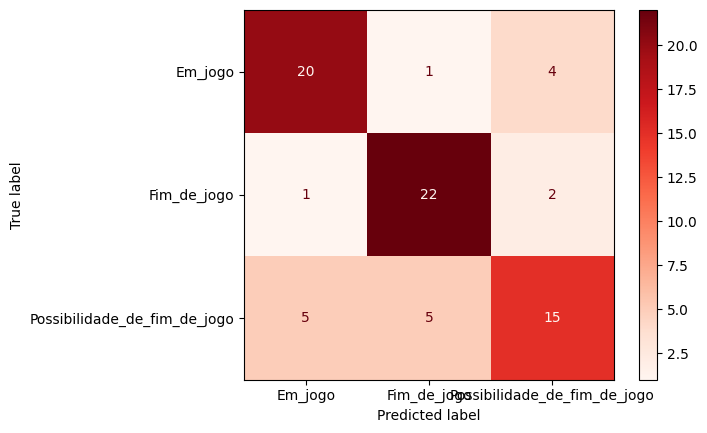

In [14]:
nomes_classes = velha.iloc[:, [9]].values
classes_unicas = np.unique(nomes_classes)
#print(classes_unicas)

cm = confusion_matrix(y_test, y_predicao)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_unicas)
disp.plot(cmap='Reds')

No trecho abaixo, mostramos a forma de cálculo da acurácia. E também executamos o método accuracy_score que igualmente calcula a acurácia. Executando ainda o método classification_report que calcula as métricas conhecidas precision, recall e f-measure.

In [15]:
acerto = 0
for i in range(0, len(y_predicao)):
  if y_predicao[i]==y_test[i]: acerto = acerto + 1

print("Acuracia: ", acerto/len(y_predicao))
print(accuracy_score(y_test, y_predicao))
print(classification_report(y_test, y_predicao))

Acuracia:  0.76
0.76
                              precision    recall  f1-score   support

                     Em_jogo       0.77      0.80      0.78        25
                 Fim_de_jogo       0.79      0.88      0.83        25
Possibilidade_de_fim_de_jogo       0.71      0.60      0.65        25

                    accuracy                           0.76        75
                   macro avg       0.76      0.76      0.76        75
                weighted avg       0.76      0.76      0.76        75



Abaixo, exibimos as classes e os pesos (modelo) encontrado no treinamento.

In [16]:
print("Classes: ", clf.classes_ )
print("Melhor loss: ", clf.best_loss_)
print(clf.coefs_)
print(clf.intercepts_)
print(clf.get_params)

Classes:  ['Em_jogo' 'Fim_de_jogo' 'Possibilidade_de_fim_de_jogo']
Melhor loss:  0.34776176556528166
[array([[-1.60477664e-01, -5.30579243e-01, -4.74626549e-01,
         3.13187741e-01,  1.06208252e-01, -3.17747908e-02,
         3.10118498e-01,  3.49693264e-01, -2.99874666e-01,
        -3.11194664e-01,  2.38349644e-01,  5.78046999e-01,
        -2.17264507e-01, -4.16274732e-02, -3.85184879e-01,
         1.74179584e-01,  5.33789137e-02, -6.07858942e-01,
        -3.37387777e-01, -1.07058524e-01, -7.77721372e-01,
        -2.78834634e-01,  1.35983233e-01,  2.46830855e-01,
        -3.65780969e-01, -3.83565921e-01, -5.34998405e-02,
         5.93521382e-01, -6.87418711e-02, -8.01868358e-02,
        -2.84170959e-01, -1.49431291e+00, -9.07166966e-02,
        -1.37294447e-01, -1.37699027e-01, -3.26456034e-01,
        -1.96109231e-01, -6.50125851e-01,  2.96796711e-01,
        -5.77537715e-01, -3.82658247e-01,  1.90299231e-01,
         9.57397756e-02, -8.49268718e-02, -1.75115622e-01,
        -1.28